<a href="https://colab.research.google.com/github/tackulus/204426/blob/main/Lab_04_610510531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workshop 4: Data Encoding and Transformation**
**คำสั่ง**

1.   ศึกษาวิธีการเข้ารหัสข้อมูลเชิงกลุ่ม  (Categorical Data Encoding)และการทำให้เป็นมาตรฐาน (Normalization) สำหรับชุดข้อมูล adult ต่อไปนี้
2.   ทดลองทำการเข้ารหัสและการทำให้เป็นมาตรฐาน ตามคำสั่งปฏิบัติการแต่ละข้อ
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_04_XXXXXXXXX.ipynb โดย XXXXXXXXX คือ รหัสนักศึกษา
4.   ทำการดาวน์โหลดและส่งไฟล์ Lab_04_XXXXXXXXX.ipynb ที่เว็บไซต์ http://hw.cs.science.cmu.ac.th 

In [1]:
%%capture
!wget -O adult.csv \
    https://raw.githubusercontent.com/tackulus/204426/main/dataset/adult.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
data = pd.read_csv("adult.csv", na_values="?")
data.dropna(subset = ["workclass","occupation","native.country"], inplace=True)
data.reset_index(inplace=True,drop=True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [4]:
# First check datatype
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

**Encoding Categorical Data**

In [5]:
##### One-hot encoding for norminal variable #####
data = pd.get_dummies(data, columns=["workclass"], prefix=["workclass"])
data.head()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0


In [6]:
##### Dummy Variable Encoding for norminal variable #####
dummy_style = OneHotEncoder(drop="first") #
results = dummy_style.fit_transform(data[["relationship"]])
encoded_df = pd.DataFrame(results.toarray(), columns=dummy_style.categories_[0].tolist()[1:])
data = data.join(encoded_df)
data.head()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0


In [7]:
##### Ordinal Encoding for ordinal variable #####
# unique value of the variable education
data.education.unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [8]:
ordinal_style = OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                                            '10th', '11th', '12th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 
                                            'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']]) #
results = ordinal_style.fit_transform(data[["education"]])
encoded_df = pd.DataFrame(results, columns=['encoded_education'])
data = data.join(encoded_df)
data.head()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,encoded_education
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,8.0
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,12.0
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0


ปฏิบัติการข้อ 1) จงเข้ารหัสตัวแปร marital.status และ occupation ด้วยวิธีเข้ารหัส one-hot encoding

In [9]:
# Answer here!
data = pd.get_dummies(data, columns=["marital.status"], prefix=["marital.status"])
data = pd.get_dummies(data, columns=["occupation"], prefix=["occupation"])
data

,age,fnlwgt,education,education.num,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,encoded_education,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,82,132870,HS-grad,9,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,54,140359,7th-8th,4,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,41,264663,Some-college,10,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,12.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,34,216864,HS-grad,9,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,38,150601,10th,6,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,310152,Some-college,10,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
30158,27,257302,Assoc-acdm,12,Wife,White,Female,0,0,38,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30159,40,154374,HS-grad,9,Husband,White,Male,0,0,40,United-States,>50K,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
30160,58,151910,HS-grad,9,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


ปฏิบัติการข้อ 2) จงเข้ารหัสตัวแปร race และ sex ด้วยวิธีเข้ารหัส dummy variable encoding

In [10]:
# Answer here!
dummy_style = OneHotEncoder(drop="first") #
for col_name in ['race', 'sex']:
    results = dummy_style.fit_transform(data[[col_name]])
    encoded_df = pd.DataFrame(results.toarray(), columns=dummy_style.categories_[0].tolist()[1:])
    data = data.join(encoded_df.astype(int))
data

,age,fnlwgt,education,education.num,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,encoded_education,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Asian-Pac-Islander,Black,Other,White,Male
0,82,132870,HS-grad,9,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,54,140359,7th-8th,4,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,41,264663,Some-college,10,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,12.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,34,216864,HS-grad,9,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,38,150601,10th,6,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,310152,Some-college,10,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
30158,27,257302,Assoc-acdm,12,Wife,White,Female,0,0,38,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
30159,40,154374,HS-grad,9,Husband,White,Male,0,0,40,United-States,>50K,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
30160,58,151910,HS-grad,9,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


ปฏิบัติการข้อ 3) จงเข้ารหัสตัวแปร income ด้วยวิธีเข้ารหัส Ordinal Encoding

In [11]:
# Answer here!
ordinal_style = OrdinalEncoder(categories=[['<=50K', '>50K']]) #
results = ordinal_style.fit_transform(data[["income"]])
encoded_df = pd.DataFrame(results, columns=['encoded_income'])
data = data.join(encoded_df.astype(int))
data

,age,fnlwgt,education,education.num,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,encoded_education,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Asian-Pac-Islander,Black,Other,White,Male,encoded_income
0,82,132870,HS-grad,9,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,54,140359,7th-8th,4,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,41,264663,Some-college,10,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,12.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,34,216864,HS-grad,9,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,38,150601,10th,6,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,310152,Some-college,10,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
30158,27,257302,Assoc-acdm,12,Wife,White,Female,0,0,38,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
30159,40,154374,HS-grad,9,Husband,White,Male,0,0,40,United-States,>50K,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1
30160,58,151910,HS-grad,9,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Data Normalization**

In [12]:
##### Data normalization #####
# min-max normalization = (value-min)/(max-min)
print("Minimun education.num = ", np.min(data['education.num']))
print("Maximum education.num = ", np.max(data['education.num']))
data['normalized_education.num'] = (data['education.num']-np.min(data['education.num']))/(np.max(data['education.num'])-np.min(data['education.num']))
data.head()

Minimun education.num =  1
Maximum education.num =  16


,age,fnlwgt,education,education.num,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,encoded_education,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Asian-Pac-Islander,Black,Other,White,Male,encoded_income,normalized_education.num
0,82,132870,HS-grad,9,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.533333
1,54,140359,7th-8th,4,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.200000
2,41,264663,Some-college,10,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,12.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.600000
3,34,216864,HS-grad,9,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.533333
4,38,150601,10th,6,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.333333


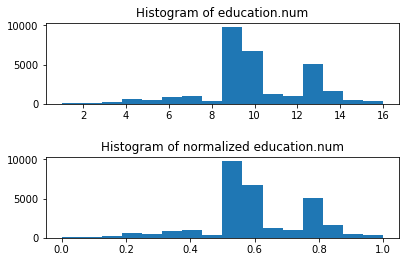

In [13]:
figure, axes = plt.subplots(nrows=2, ncols=1)
axes[0].hist(data['education.num'], bins=16)
axes[0].title.set_text('Histogram of education.num')
axes[1].hist(data['normalized_education.num'], bins=16)
axes[1].title.set_text('Histogram of normalized education.num')
figure.tight_layout(pad=2.0)

In [14]:
# Z-score standardization = (value-mean)/sd
print("Mean of education.num = ", np.mean(data['education.num']))
print("SD of education.num = ", np.std(data['education.num']))
data['standardized_education.num'] = (data['education.num']-np.mean(data['education.num']))/np.std(data['education.num'])
data.head()

Mean of education.num =  10.12131158411246
SD of education.num =  2.5499526468579656


,age,fnlwgt,education,education.num,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,encoded_education,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Asian-Pac-Islander,Black,Other,White,Male,encoded_income,normalized_education.num,standardized_education.num
0,82,132870,HS-grad,9,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738
1,54,140359,7th-8th,4,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.200000,-2.400559
2,41,264663,Some-college,10,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,12.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.600000,-0.047574
3,34,216864,HS-grad,9,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738
4,38,150601,10th,6,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.333333,-1.616231


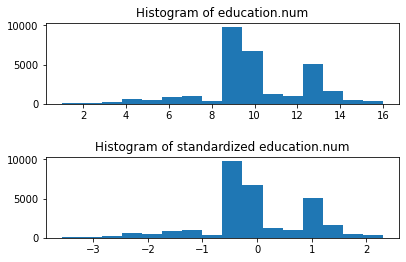

In [15]:
figure, axes = plt.subplots(nrows=2, ncols=1)
axes[0].hist(data['education.num'], bins=16)
axes[0].title.set_text('Histogram of education.num')
axes[1].hist(data['standardized_education.num'], bins=16)
axes[1].title.set_text('Histogram of standardized education.num')
figure.tight_layout(pad=2.0)

ปฏิบัติการข้อ 4) จงแปลงค่าตัวแปร hours.per.week ให้เป็นมาตรฐานด้วยวิธี min-max normalization

In [16]:
# Answer here!
data['normalized_hours.per.week'] = (data['hours.per.week']-np.min(data['hours.per.week']))/(np.max(data['hours.per.week'])-np.min(data['hours.per.week']))
data

,age,fnlwgt,education,education.num,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,encoded_education,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Asian-Pac-Islander,Black,Other,White,Male,encoded_income,normalized_education.num,standardized_education.num,normalized_hours.per.week
0,82,132870,HS-grad,9,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738,0.173469
1,54,140359,7th-8th,4,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.200000,-2.400559,0.397959
2,41,264663,Some-college,10,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,12.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.600000,-0.047574,0.397959
3,34,216864,HS-grad,9,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738,0.448980
4,38,150601,10th,6,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.333333,-1.616231,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,310152,Some-college,10,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0.600000,-0.047574,0.397959
30158,27,257302,Assoc-acdm,12,Wife,White,Female,0,0,38,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.733333,0.736754,0.377551
30159,40,154374,HS-grad,9,Husband,White,Male,0,0,40,United-States,>50K,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.533333,-0.439738,0.397959
30160,58,151910,HS-grad,9,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738,0.397959


ปฏิบัติการข้อ 5) จงแปลงค่าตัวแปร capital.gain ให้เป็นมาตรฐานด้วยวิธี z-score normalization

In [17]:
# Answer here!
data['standardized_capital.gain'] = (data['capital.gain']-np.mean(data['capital.gain']))/np.std(data['capital.gain'])
data

,age,fnlwgt,education,education.num,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,encoded_education,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Asian-Pac-Islander,Black,Other,White,Male,encoded_income,normalized_education.num,standardized_education.num,normalized_hours.per.week,standardized_capital.gain
0,82,132870,HS-grad,9,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738,0.173469,-0.147445
1,54,140359,7th-8th,4,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.200000,-2.400559,0.397959,-0.147445
2,41,264663,Some-college,10,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,12.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.600000,-0.047574,0.397959,-0.147445
3,34,216864,HS-grad,9,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738,0.448980,-0.147445
4,38,150601,10th,6,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.333333,-1.616231,0.397959,-0.147445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,310152,Some-college,10,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0.600000,-0.047574,0.397959,-0.147445
30158,27,257302,Assoc-acdm,12,Wife,White,Female,0,0,38,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.733333,0.736754,0.377551,-0.147445
30159,40,154374,HS-grad,9,Husband,White,Male,0,0,40,United-States,>50K,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.533333,-0.439738,0.397959,-0.147445
30160,58,151910,HS-grad,9,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738,0.397959,-0.147445


ปฏิบัติการข้อ 6) จงแปลงค่าตัวแปร capital.loss ให้เป็นมาตรฐานด้วยวิธี z-score normalization

In [18]:
# Answer here!
data['standardized_capital.loss'] = (data['capital.loss']-np.mean(data['capital.loss']))/np.std(data['capital.loss'])
data.head()

,age,fnlwgt,education,education.num,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,encoded_education,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Asian-Pac-Islander,Black,Other,White,Male,encoded_income,normalized_education.num,standardized_education.num,normalized_hours.per.week,standardized_capital.gain,standardized_capital.loss
0,82,132870,HS-grad,9,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738,0.173469,-0.147445,10.555814
1,54,140359,7th-8th,4,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.200000,-2.400559,0.397959,-0.147445,9.427915
2,41,264663,Some-college,10,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,12.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.600000,-0.047574,0.397959,-0.147445,9.427915
3,34,216864,HS-grad,9,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738,0.448980,-0.147445,9.106365
4,38,150601,10th,6,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.333333,-1.616231,0.397959,-0.147445,9.106365


ปฏิบัติการข้อ 7) จงลบ column ของตัวแปร  hours.per.week capital.gain และ capital.loss ที่ยังไม่ได้แปลงค่าให้เป็นมาตรฐานออกจาก dataset

In [19]:
# Answer here!
data = data.drop(["hours.per.week", "capital.gain", "capital.loss"], axis=1)
data.head()

,age,fnlwgt,education,education.num,relationship,race,sex,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,encoded_education,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Asian-Pac-Islander,Black,Other,White,Male,encoded_income,normalized_education.num,standardized_education.num,normalized_hours.per.week,standardized_capital.gain,standardized_capital.loss
0,82,132870,HS-grad,9,Not-in-family,White,Female,United-States,<=50K,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738,0.173469,-0.147445,10.555814
1,54,140359,7th-8th,4,Unmarried,White,Female,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.200000,-2.400559,0.397959,-0.147445,9.427915
2,41,264663,Some-college,10,Own-child,White,Female,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,12.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.600000,-0.047574,0.397959,-0.147445,9.427915
3,34,216864,HS-grad,9,Unmarried,White,Female,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.533333,-0.439738,0.448980,-0.147445,9.106365
4,38,150601,10th,6,Unmarried,White,Male,United-States,<=50K,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.333333,-1.616231,0.397959,-0.147445,9.106365
